In [170]:
#Importing Libraries
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [171]:
titanic_data=pd.read_csv('titanic_data.csv')

In [172]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [173]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


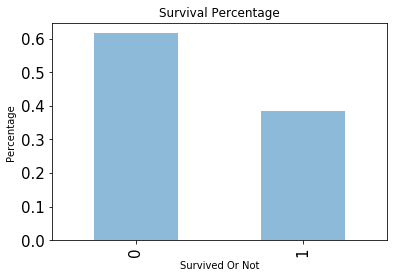

In [175]:
titanic_data['Survived'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Survived Or Not')
plt.ylabel('Percentage ')
plt.title("Survival Percentage")
plt.savefig('Survival.png')
plt.show()

In [176]:
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [177]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
print("age",titanic_data.Age.isna().sum())
print("cabin",titanic_data.Cabin.isna().sum())
print("embark",titanic_data.Embarked.isna().sum())

age 177
cabin 687
embark 2


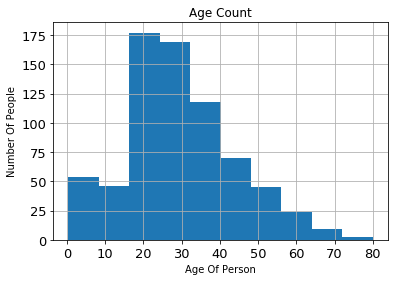

In [179]:
titanic_data.Age.hist()
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Age Of Person')
plt.ylabel('Number Of People')
plt.title("Age Count")
# plt.legend(loc='best')
plt.savefig('Age.png')
plt.show()

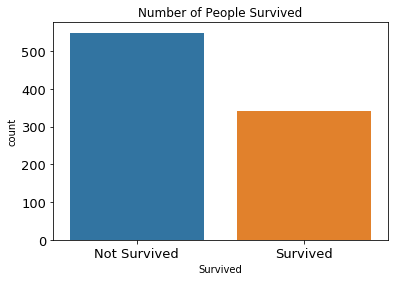

In [180]:
sns.countplot(x='Survived',data=titanic_data)
label=['Not Survived','Survived']
plt.xticks(titanic_data['Survived'].unique(), label, size=13)
plt.yticks(size=13)
plt.title("Number of People Survived")
plt.savefig('survived_people.png')
plt.show()

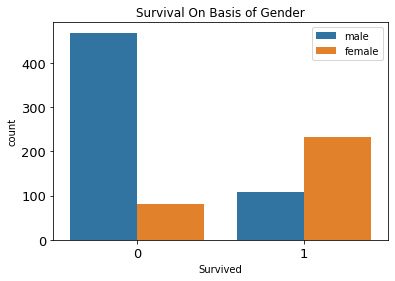

In [181]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Gender")
plt.legend(loc='best')
plt.savefig('Survival_gender.png')
plt.show()

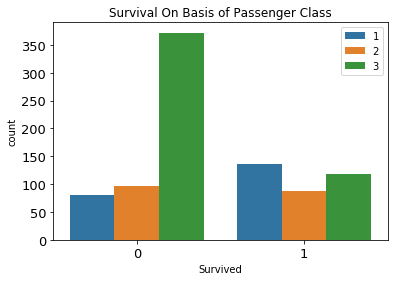

In [182]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Passenger Class")
plt.legend(loc='best')
plt.savefig('Survival_Pclass.png')
plt.show()

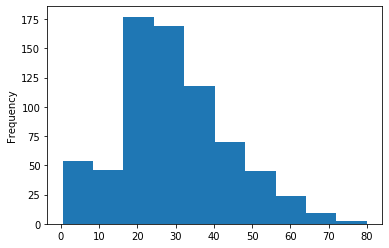

In [183]:
titanic_data['Age'].plot.hist()

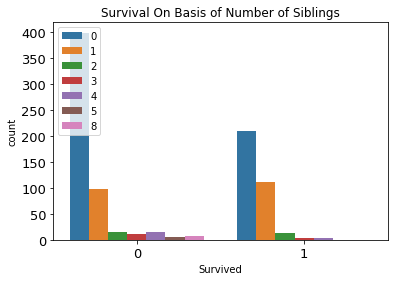

In [184]:
sns.countplot(x='Survived',hue='SibSp',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Siblings")
plt.legend(loc='best')
plt.savefig('Survival_sibling.png')
plt.show()

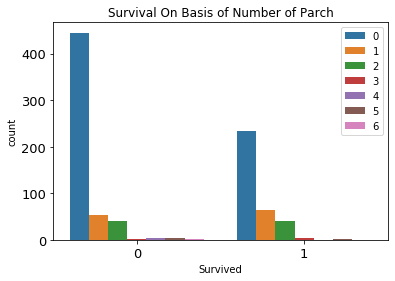

In [185]:
sns.countplot(x='Survived',hue='Parch',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Parch")
plt.legend(loc='best')
plt.savefig('Survival_parch.png')
plt.show()

In [186]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [187]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [188]:
Sex=pd.get_dummies(titanic_data['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [189]:
Passengerclass=pd.get_dummies(titanic_data['Pclass'])
Passengerclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [190]:
Embark=pd.get_dummies(titanic_data['Embarked'])
Embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [191]:
titanic_data=pd.concat([titanic_data,Sex,Passengerclass,Embark],axis=1)

In [192]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1


In [193]:
titanic_data.drop(['PassengerId','Pclass','Name','Ticket','Embarked','Sex'],axis=1,inplace=True)

In [194]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


Applying LR_Model to Predict the Survival of Passenger

In [195]:
X,Y=titanic_data.drop(['Survived','C','Q','S','male'],axis=1),titanic_data.Survived
X.head()

,Age,SibSp,Parch,Fare,female,1,2,3
0,22.0,1,0,7.2500,0,0,0,1
1,38.0,1,0,71.2833,1,1,0,0
2,26.0,0,0,7.9250,1,0,0,1
3,35.0,1,0,53.1000,1,1,0,0
4,35.0,0,0,8.0500,0,0,0,1


In [196]:
X.shape[0]

891

In [197]:
Y.shape[0]

891

In [206]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)

In [199]:
model=LogisticRegression()

In [228]:
df = pd.DataFrame(data=titanic_data)

In [229]:
df = pd.get_dummies(df)
df

,Survived,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,0,22.0,1,0,7,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13,0,1,0,1,0,0,0,1
887,1,19.0,0,0,30,1,0,1,0,0,0,0,1
888,0,NaN,1,2,23,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30,0,1,1,0,0,1,0,0


In [242]:
Y = df.iloc[:,0]
X = df.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2) 

num_train = y_train.shape[0]
num_test = y_test.shape[0]
print('train: ' + str(num_train) + ', test: ' + str(num_test))

train: 623, test: 268


In [233]:
df.Age = df.Age.fillna(titanic_data['Age'].mean())

In [234]:
df.isnull().any()

Survived    False
Age         False
SibSp       False
Parch       False
Fare        False
female      False
male        False
1           False
2           False
3           False
C           False
Q           False
S           False
dtype: bool

In [245]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test) 
print('Incorrect Data: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1: %.4f' % f1_score(y_test, y_pred))

Incorrect Data: 56 out of 268
Accuracy: 0.7910
F1: 0.7282


In [246]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test) 
print('Incorrect Data: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1: %.4f' % f1_score(y_test, y_pred))

Incorrect Data: 63 out of 268
Accuracy: 0.7649
F1: 0.6802
